<a href="https://colab.research.google.com/github/vicliv/NN-from-scratch/blob/main/mlp_victor_livernoche_260926276.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# color list to use for the plots
color = ['r', 'b', 'g', 'k', 'y', 'm', 'c', 'orange', 'gold', 'purple', 'navy', 'violet', 'pink', 'khaki', 'darkolivegreen', 'chocolate', 'steelblue', 'crimson', 'cadetblue', 'slategray', 'bisque', 'olivedrab']

In [ ]:
#To ensure reproducibility
np.random.seed(11)

In [ ]:
# This code defines the inputs and outputs for our four problems, using a task object

class task(object):
    """
    The task object stores the inputs and outputs for a given problem in order to keep things
    consistent between tasks.
    """
    
    # The initialization function, inputs and outputs must be provided here
    def __init__(self,inputs,outputs):
        """
        Provide a set of inputs and outputs that define the task. Both the inputs and the outputs
        must be a 2D tuple, organized by cases (e.g. data points) on the first dimension, and units
        on the second dimension, e.g. for XOR the first dimension will be 4 in length for both, the
        inputs will have length 2 for the second dimension, and the outputs length 1.
        """
    
        # store the inputs and outputs as numpy arrays
        self.inputs  = np.array(inputs)
        self.outputs = np.array(outputs)
        
        # double check the dimensions are right
        assert self.inputs.shape[0] == self.outputs.shape[0], "Number of cases in input and output not equal."
            
        
    # A function to determine the number of cases
    def ncases(self):
        return self.inputs.shape[0]
    
    # A function to determine the number of input units
    def ninputs(self):
        return self.inputs.shape[1]
    
    # A function to determine the number of output units
    def noutputs(self):
        return self.outputs.shape[1]

# The AND Problem
inputs  = ((0,0),(0,1),(1,0),(1,1))
outputs = ((0,),(0,),(0,),(1,))
andtask = task(inputs,outputs)

# The XOR Problem
inputs  = ((0,0),(0,1),(1,0),(1,1))
outputs = ((0,),(1,),(1,),(0,))
xortask = task(inputs,outputs)

# The Encoding Problem
inputs  = ((1,0,0,0,0,0,0,0),(0,1,0,0,0,0,0,0),(0,0,1,0,0,0,0,0),(0,0,0,1,0,0,0,0),
           (0,0,0,0,1,0,0,0),(0,0,0,0,0,1,0,0),(0,0,0,0,0,0,1,0),(0,0,0,0,0,0,0,1))
outputs = ((1,0,0,0,0,0,0,0),(0,1,0,0,0,0,0,0),(0,0,1,0,0,0,0,0),(0,0,0,1,0,0,0,0),
           (0,0,0,0,1,0,0,0),(0,0,0,0,0,1,0,0),(0,0,0,0,0,0,1,0),(0,0,0,0,0,0,0,1))
enctask = task(inputs,outputs)

# The Negation Problem
inputs  = ((0,0,0,0),(0,0,0,1),(0,0,1,0),(0,0,1,1),(0,1,0,0),(0,1,0,1),(0,1,1,0),(0,1,1,1),
           (1,0,0,0),(1,0,0,1),(1,0,1,0),(1,0,1,1),(1,1,0,0),(1,1,0,1),(1,1,1,0),(1,1,1,1))
outputs = ((0,0,0),(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0),(1,1,1),
           (1,1,1),(1,1,0),(1,0,1),(1,0,0),(0,1,1),(0,1,0),(0,0,1),(0,0,0))
negtask = task(inputs,outputs)

In [ ]:
# create an activation class to make the code modular
class activation(object):
  """
  Class to create an activation function with its derivative
  to use in a backward propagation algorithm
  """
  def __init__(self, activation_function, derivative_function):
    self.function = activation_function
    self.derivative = derivative_function

In [ ]:
# create sigmoid function
sigmoid_function = lambda z: 1./ (1 + np.exp(-z)) # activation function

# create the derivative of the sigmoid function
def derivative_sigmoid(z):
    return sigmoid_function(z) * (1 - sigmoid_function(z))

# create the class containing the sigmoid activation function
sigmoid = activation(sigmoid_function, derivative_sigmoid)

In [ ]:
class GradientDescent:
    """
    Gradient Descent algorithm to use as an optimizer. Pass the learning rate
    and the loss function when creating the object.
    """

    # define loss and learning rate of the optimizer
    def __init__(self, loss, learning_rate=.1):
        self.learning_rate = learning_rate
        self.loss = loss
            
    def run(self, x, y, w, activation):
        grad = self.loss.backward(x, y, w, activation)   # compute the backward propagation with present weight

        for i in range(len(w)):
          w[i] = w[i] - self.learning_rate * grad[i]   # weight update step

        activity = np.dot(w[0],x)
        loss = self.loss.function(forward(x, w, activation)[-1][0:-1,:]-y)   # compute loss to record
        return w, loss, activity # new weight, the loss, and the activity of the hidden layer

In [ ]:
    # Function to pass forward throught the MLP
    def forward(x, w, activation):
      function = np.vectorize(activation.function) # vectorize the activation function to use on a numpy array
  
      # get the output at each layer (activity of each layer)
      O = []
      O.append(x)
      for i in range(0, len(w)):
        oi = function(np.dot(w[i], O[i])) # compute the output at this layer
        oi = np.vstack((oi, np.ones((1, oi.shape[1])))) # add bias to the ouput
        O.append(oi)
      return O

In [ ]:
# create mean square error loss function
class MSE:
    """
    Mean square error class with backward function
    """

    def __init__(self):
      return None
  
    # The loss function
    def function(self, z):
      return np.sum(np.array(np.square(z)).sum())/2

    # backward propagation throught all the layers
    def backward(self, x, y, w, activation):
      # vectorize the functions to be able to use them on a numpy array
      function = np.vectorize(activation.function)
      derivative = np.vectorize(activation.derivative)

      O = forward(x, w, activation) # get the output at each layer

      delta = []
      # Get the Delta for Wy (last synapse weights) using the output, the MSE and the weights
      delta.append(np.multiply(O[len(O)-1][0:-1, :] - y, derivative(np.dot(w[len(w)-1], O[len(w)-1]))))
      k = 0
      for i in range(len(w)-2, -1, -1): # compute the Delta for the remaining weights from top to bottom
        delta.append(np.multiply(np.dot(np.transpose(w[i+1][:, 0:-1]), delta[k]), derivative(np.dot(w[i], O[i]))))
        k += 1
  
      delta_w = []
      delta = delta[::-1] # inverse delta since it was in the wrong oder
      for i in range(len(delta)): # compute the new delta weight using the outputs and the computed deltas
        delta_w.append(np.dot(delta[i], np.transpose(O[i])))

      return delta_w


In [ ]:
class mlp(object):
    """
    Define a class for a multilayer perceptron here (just one hidden layer).
    You must also define the functions below, and use the arguments provided, 
    but you can add additional arguments if you wish.
    Also, note that you are welcome to write your own helper functions. 
    Reminder: you should use numpy functions for vector and matrix operations, 
    and you have to calculate your own gradients for backprop. No autograd!
    """
    
    # The initialization function for the mlp
    def __init__(self, task, nhid, optimizer, activation_function):
        """
        Comment!!!! Your marks depend on it!
        
        Note: You must use the arguments here for the task number of hidden units.
        """
        self.activation = activation_function # what activation function is going to be use
        self.optimizer = optimizer # the optimizer (Gradent Descent)
        self.x = np.transpose(np.array(task.inputs)) # make the input in an array from
        self.y = np.transpose(np.array(task.outputs)) # make the target output in an array from

        # create lists to keep an history for the plots
        self.loss_history = []
        self.weight_history = [[], []]
        self.activity_history = []

        # Initialize the synaptic weights randomly using a standard normal distribution
        # Use the size of the inputs and given nhid and add bias
        self.w = [np.random.normal(0, 1, (nhid, task.ninputs()+1)), np.random.normal(0, 1, (task.noutputs(), nhid+1))]
        
        # add bias to input
        N = self.x.shape[1]
        self.x = np.vstack((self.x, np.ones((1,N))))
     
    # The function for training the network for one epoch (i.e. one pass through the data)
    def train_one_epoch(self):
        """
        Train the network on the task provided at initialization for one epoch. This
        function should be called by the train() function.

        Comment!!!! Your marks depend on it!
        """

        # run the optimizer, gradient descent is the only one implemented
        w, l, a = self.optimizer.run(self.x, self.y, self.w, self.activation)

        # add the updated weight and loss to history
        self.weight_history[0].append(w[0])
        self.weight_history[1].append(w[1])
        self.loss_history.append(l)
        self.activity_history.append(a)
    
    # The function for training the network
    def train(self, epochs):
        """
        Train the network on the task provided at initialization.

        Comment!!!! Your marks depend on it!
        """

        for i in range(0, epochs):
          self.train_one_epoch()
          
    
    # The function for plotting the loss after training
    def plot_loss(self):
        """
        Plot the loss over epochs.
        
        Comment!!!! Your marks depend on it!
        """
        plt.plot(np.arange(len(self.loss_history)), self.loss_history, 'r-')
        plt.show()
    
    # The function for plotting the hidden units weights
    def plot_weights(self, node = -1):
        """
        Plot the hidden unit weights.
        
        Comment!!!! Your marks depend on it!
        """

        k = 0 # color index

        # plot the hidden weights Wh
        for i in range(len(self.w[0])): # for each hidden units
          if (node == -1 or node == i): # check if we are plotting a specific node only
            for j in range(len(self.w[0][i])): # for each corresponding synape
                plt.plot(np.arange(len(self.weight_history[0])), np.array(self.weight_history[0])[:, i][:, j], color = color[k%len(color)], label = 'Wh' + str(i) + str(j))
                k += 1
          else:
            continue

        # plot the output weights Wy
        for i in range(len(self.w[1])): # for each hidden units
          for j in range(len(self.w[1][i])): # check if we are plotting a specific node only
            if (node == -1 or node == j): # for each corresponding synape
              plt.plot(np.arange(len(self.weight_history[1])), np.array(self.weight_history[1])[:, i][:, j], color = color[k%len(color)], label = 'Wy' + str(i) + str(j))
              k += 1
            else:
              continue

        plt.legend()
        plt.show()
    
    # The function for plotting the hidden unit activity
    def plot_activity(self, node = -1):
        """
        Plot the activity of the hidden units for the given task.
        
        Comment!!!! Your marks depend on it!
        """

        k = 0 # color index

        # plot the activity of the hidden units
        for i in range(self.activity_history[0].shape[0]): # for each hidden units
          if (node == -1 or node == i): # check if we are plotting a specific node only
            for j in range(self.activity_history[0].shape[1]): # for each corresponding synapses
                plt.plot(np.arange(len(self.activity_history)), np.array(self.activity_history)[:, i][:, j], color = color[k%len(color)], label = 'ah' + str(i) + str(j))
                k += 1
          else:
            continue
        plt.legend()
        plt.show()
    
    # Add a function to get the resulting output from the input
    def predict(self, input):
      O = forward(input, self.w, self.activation) # forward pass
      return np.round(np.delete(O[-1], -1, axis=0)) # get final output without the ones for bias

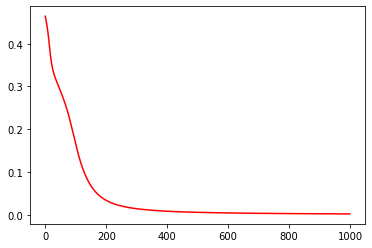

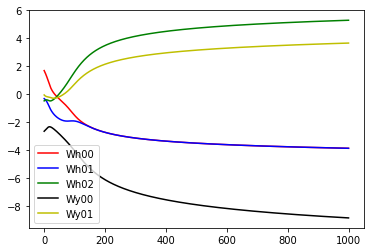

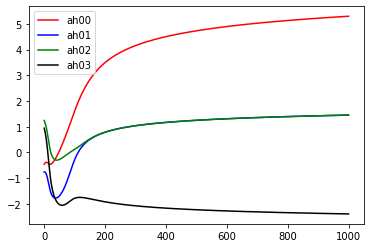

[[0. 0. 0. 1.]]


In [ ]:
# Part 1: Create a MLP and train it on the AND task, plot the loss, hidden unit weights, and hidden activity

optimizer = GradientDescent(MSE(), 1)
andmlp = mlp(andtask, 1, optimizer, sigmoid)
andmlp.train(1000)
andmlp.plot_loss()
andmlp.plot_weights()
andmlp.plot_activity()
print(andmlp.predict(andmlp.x))

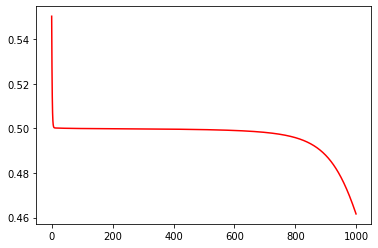

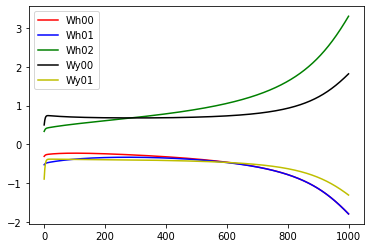

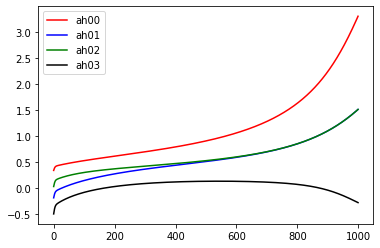

[[1. 1. 1. 0.]]


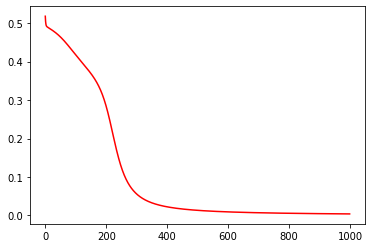

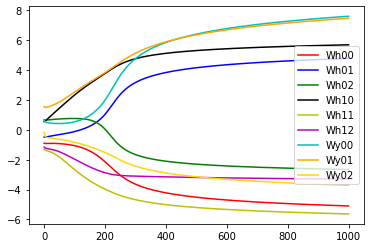

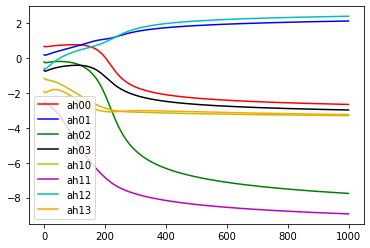

[[0. 1. 1. 0.]]


In [ ]:
# Part 2: Create a MLP and train it on the XOR task, plot the loss, hidden unit weights, and hidden activity
optimizer = GradientDescent(MSE(), 1)
xormlp = mlp(xortask, 1, optimizer, sigmoid)
xormlp.train(1000)
xormlp.plot_loss()
xormlp.plot_weights()
xormlp.plot_activity()
print(xormlp.predict(xormlp.x))

optimizer = GradientDescent(MSE(), 1)
xormlp = mlp(xortask, 2, optimizer, sigmoid)
xormlp.train(1000)
xormlp.plot_loss()
xormlp.plot_weights()
xormlp.plot_activity()
print(xormlp.predict(xormlp.x))

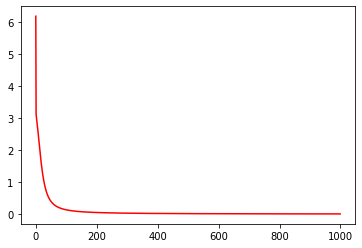

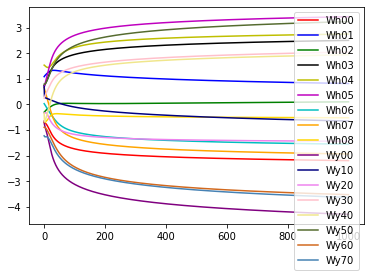

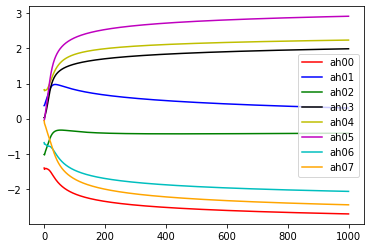

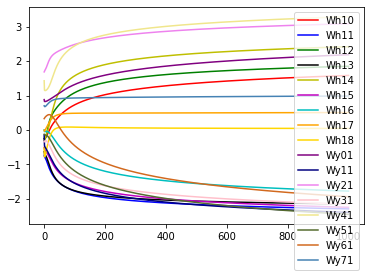

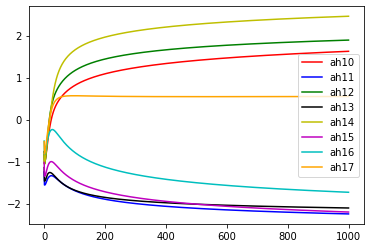

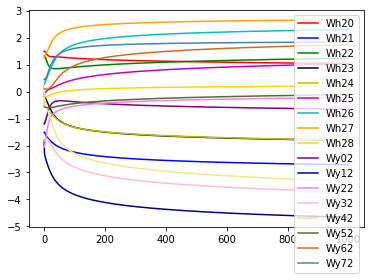

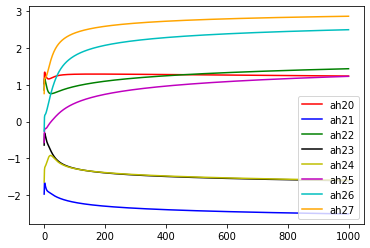

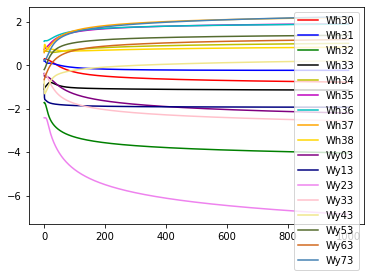

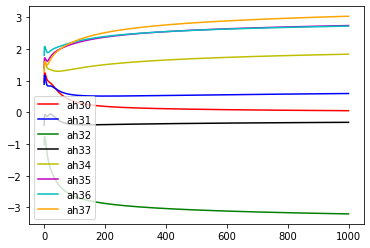

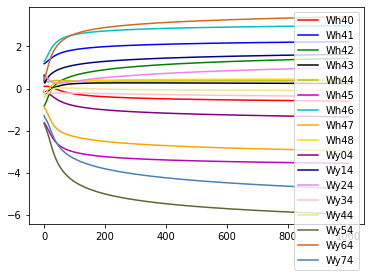

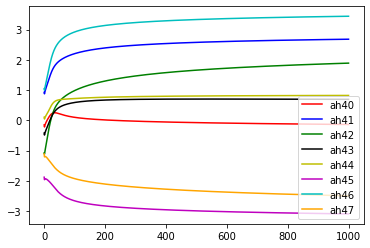

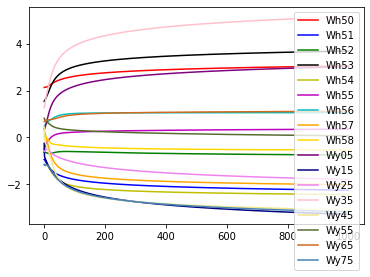

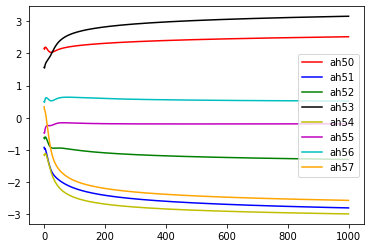

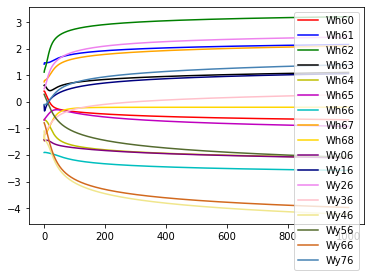

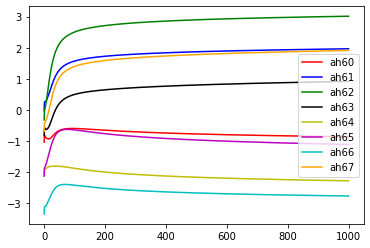

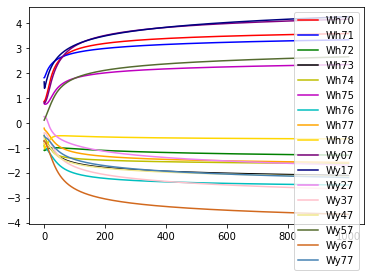

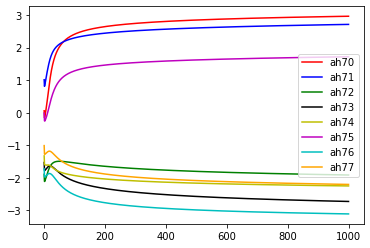

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


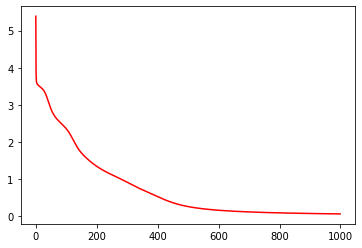

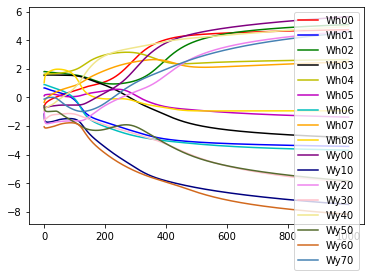

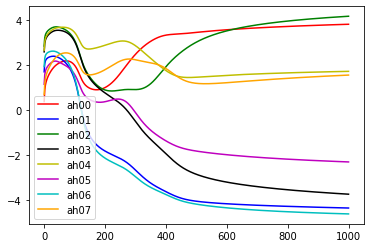

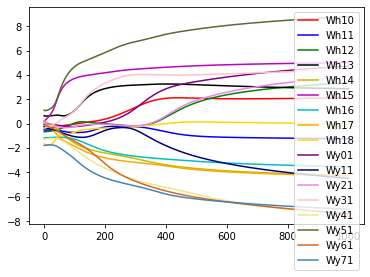

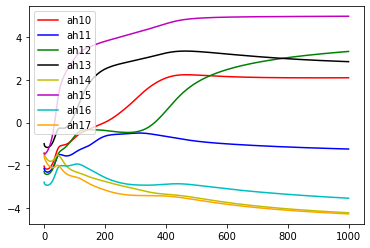

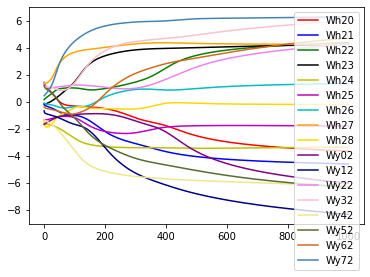

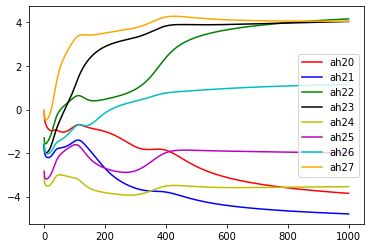

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# Part 3: Create a MLP and train it on the Encoding task, plot the loss, hidden unit weights, and hidden activity
optimizer = GradientDescent(MSE(), 1)
encmlp = mlp(enctask, 8, optimizer, sigmoid)
encmlp.train(1000)
encmlp.plot_loss()
for i in range(0,8):
  encmlp.plot_weights(i)
  encmlp.plot_activity(i)
print(encmlp.predict(encmlp.x))

optimizer = GradientDescent(MSE(), 1)
encmlp = mlp(enctask, 3, optimizer, sigmoid)
encmlp.train(1000)
encmlp.plot_loss()
for i in range(0,3):
  encmlp.plot_weights(i)
  encmlp.plot_activity(i)
print(encmlp.predict(encmlp.x))

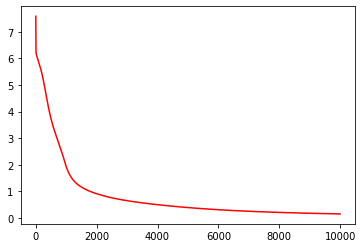

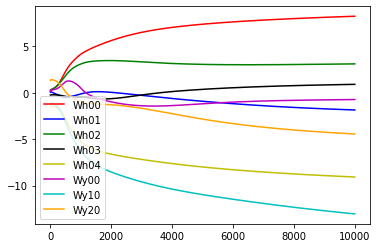

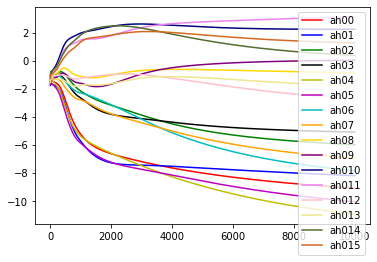

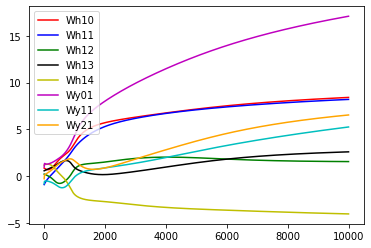

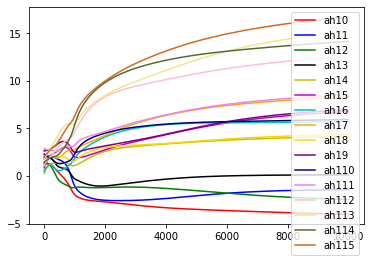

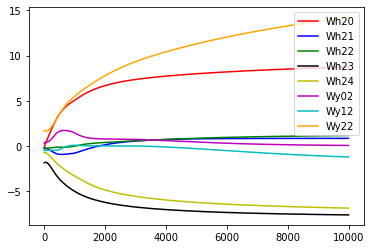

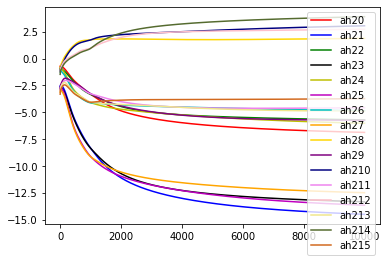

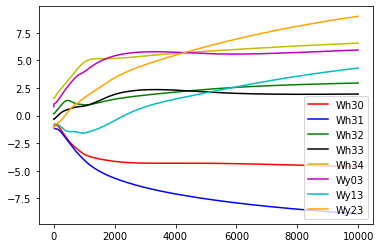

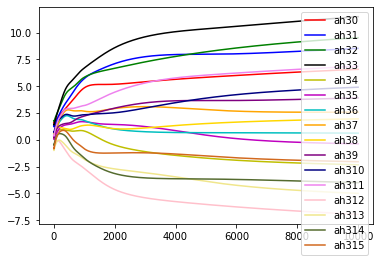

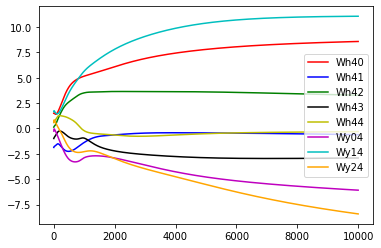

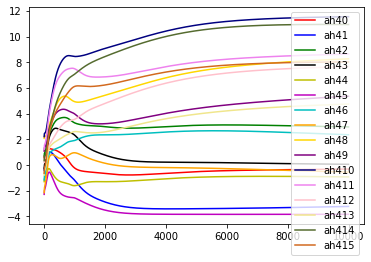

[[0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]]


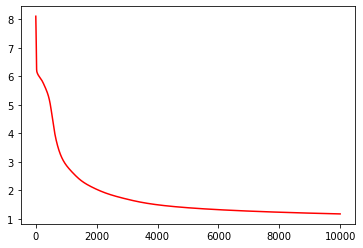

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]]


In [ ]:
# Part 4: Create a MLP and train it on the Negation task, plot the loss, hidden unit weights, and hidden activity
optimizer = GradientDescent(MSE(), 0.1)
negmlp = mlp(negtask, 5, optimizer, sigmoid)
negmlp.train(10000)
negmlp.plot_loss()
for i in range(0,5):
  negmlp.plot_weights(i)
  negmlp.plot_activity(i)
print(negmlp.predict(negmlp.x))

optimizer = GradientDescent(MSE(), 0.1)
negmlp = mlp(negtask, 4, optimizer, sigmoid)
negmlp.train(10000)
negmlp.plot_loss()
print(negmlp.predict(negmlp.x))